<a href="https://colab.research.google.com/github/raulrosapacheco/IMC-Pacientes/blob/main/Projeto_AnaliseDados_Integracao_Python_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font>Projeto: Integração Linguagem Python e SQL para Análise de Dados</font>
<font>Fonte de Dados: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database<br><br> O dataset PIMA possui dados de pacientes quem possuem ou não diabetes. Nesse projeto devemos extrair uma amostra de dados de pacientes com mais de 45 anos e criar uma nova coluna indicando se o paciente está abaixo do peso, peso normal, sobrepeso ou obeso, conforme imagem abaixo.</font>

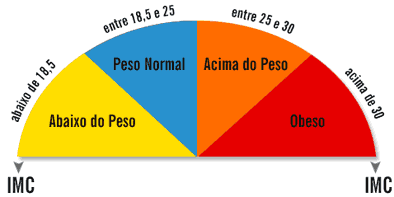


1 - Os dados serão carregados em Liguagem Python; 

2 - Faremos uma copia para um Banco de Dados SQL;

3 - As transformações dos dados serão realizadas em Linguagem SQL;

4 - O dados serão transformados novamente para um DataFrame do Pandas e salvos em um arquivo CSV.

In [ ]:
# Instalando Pandas
!pip install -q -U pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 39.6 MB/s eta 0:00:00


In [ ]:
# Instalando o pacote iPython-sql (permite utilizar linguagem sql em python)
!pip install -q ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


In [ ]:
# Importando pacotes pandas e chamando de pd
# Importando pacote sqlite, banco de dados onde serão armazenados os registros
import pandas as pd
import sqlite3

In [ ]:
# Montando pasta para salvar arquivos
from google.colab import files

## Carregando Dados usando Linguagem Python

In [ ]:
# Criando um DataFrame 'df' com o arquivo csv armazenado no GitHub
df = pd.read_csv('https://raw.githubusercontent.com/raulrosapacheco/Python-AnaliseDados/main/01-Projeto-IntegracaoPythonSQL/diabetes.csv')

In [ ]:
# Tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Formato
df.shape

(768, 9)

In [ ]:
# Visualizando os 5 primeiros registros
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Copiando dados para uma Banco de Dados SQL 

In [ ]:
# Criando uma conexão ao banco de dados SQLite
# 'cnn' será o nome da conexão
# Um database 'dbprojeto1.db' é criado dentro da pasta 'Databases' 
cnn = sqlite3.connect('dbprojeto1.db')

In [ ]:
# Copiando o DataFrame 'df' para dentro do Banco de Dados como uma tabela
# O DataFrame 'df' é convertido para formato SQL e gravado na conexão 'cnn' em
# uma tabela chamada 'diabetes'
df.to_sql('diabetes', cnn)

768

In [ ]:
# Carregando a extensão SQL para executar queries aqui 
%load_ext sql

In [ ]:
# Definindo o Banco de Dados a ser utilizado
%sql sqlite:///dbprojeto1.db

'Connected: @dbprojeto1.db'

## Transformando dados em Linguagem SQL

In [ ]:
%%sql

SELECT COUNT(*) FROM diabetes
WHERE Age > 45

 * sqlite:///dbprojeto1.db
Done.


COUNT(*)
118


In [ ]:
# Visualizando as Colunas do DataFrame 'df'
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
%%sql

CREATE TABLE pacientes (Pregnancies INT,
                        Glucose INT,
                        BloodPressure INT,
                        SkinThickness INT,
                        Insulin INT,
                        BMI DECIMAL(8, 2),
                        DiabetesPedigreeFunction DECIMAL(8, 2),
                        Age INT,
                        Outcome INT);

 * sqlite:///dbprojeto1.db
Done.


[]

In [ ]:
%%sql 

SELECT * FROM pacientes

 * sqlite:///dbprojeto1.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
%%sql

INSERT INTO pacientes(Pregnancies, 
                      Glucose, 
                      BloodPressure, 
                      SkinThickness, 
                      Insulin, 
                      BMI, 
                      DiabetesPedigreeFunction, 
                      Age, 
                      Outcome) 
SELECT Pregnancies, 
       Glucose, 
       BloodPressure, 
       SkinThickness, 
       Insulin, 
       BMI, 
       DiabetesPedigreeFunction, 
       Age, 
       Outcome 
FROM diabetes WHERE Age > 45;

 * sqlite:///dbprojeto1.db
118 rows affected.


[]

In [ ]:
%%sql

SELECT * FROM pacientes LIMIT 10

 * sqlite:///dbprojeto1.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
8,99,84,0,0,35.4,0.388,50,0
11,143,94,33,146,36.6,0.254,51,1
13,145,82,19,110,22.2,0.245,57,0
5,109,75,26,0,36,0.546,60,0


In [ ]:
%%sql

ALTER TABLE pacientes
ADD Rotundity VARCHAR(10);

UPDATE pacientes
SET Rotundity = 'Abaixo'
WHERE BMI < 18.5;

UPDATE pacientes
SET Rotundity = 'Normal'
WHERE BMI >= 18.5 AND BMI < 25;

UPDATE pacientes
SET Rotundity = 'Sobrepeso'
WHERE BMI >= 25 AND BMI < 30;

UPDATE pacientes
SET Rotundity = 'Obeso'
WHERE BMI >= 30;

 * sqlite:///dbprojeto1.db
Done.
2 rows affected.
19 rows affected.
30 rows affected.
67 rows affected.


[]

In [ ]:
%%sql

SELECT * FROM pacientes LIMIT 10

 * sqlite:///dbprojeto1.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rotundity
6,148,72,35,0,33.6,0.627,50,1,Obeso
2,197,70,45,543,30.5,0.158,53,1,Obeso
8,125,96,0,0,0,0.232,54,1,Abaixo
10,139,80,0,0,27.1,1.441,57,0,Sobrepeso
1,189,60,23,846,30.1,0.398,59,1,Obeso
5,166,72,19,175,25.8,0.587,51,1,Sobrepeso
8,99,84,0,0,35.4,0.388,50,0,Obeso
11,143,94,33,146,36.6,0.254,51,1,Obeso
13,145,82,19,110,22.2,0.245,57,0,Normal
5,109,75,26,0,36,0.546,60,0,Obeso


## Carregando dados transformados no Pandas e salvando em um arquivo CSV

In [ ]:
# Gravando resultado de uma Query em um cursor
query = cnn.execute("SELECT * FROM pacientes")
query

In [ ]:
# Criando uma Lista com o nome das colunas
cols = [col[0] for col in query.description]
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Rotundity']

In [ ]:
# Criando um DataFrame Pandas
df_final = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [ ]:
df_final.shape

(118, 10)

In [ ]:
df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rotundity
0,6,148,72,35,0,33.6,0.627,50,1,Obeso
1,2,197,70,45,543,30.5,0.158,53,1,Obeso
2,8,125,96,0,0,0.0,0.232,54,1,Abaixo
3,10,139,80,0,0,27.1,1.441,57,0,Sobrepeso
4,1,189,60,23,846,30.1,0.398,59,1,Obeso


In [ ]:
# Salvando DataFrame 'df_final' em arquivo CSV
df_final.to_csv('diabetes>45+rotundity.csv', index = False)

In [ ]:
# Fazendo download em sua máquina local
files.download('diabetes>45+rotundity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Fim**

Desenvolvido por Raul Rosa.

raulrosa.dev@gmail.com

<a href="https://www.linkedin.com/in/raul-rosa/">LinkedIn</a>

